US T: 6351
6351
[24. nan 10. 22. 26. 25. 23. 17. 19. 20. 27. 15. 28.  1.  2. 29. 43.]
['Entertainment', 'Music', 'People & Blogs', 'Howto & Style', 'News & Politics', 'Comedy', 'Sports', 'Travel & Events', 'Gaming', 'Education', 'Pets & Animals', 'Science & Technology', 'Film & Animation', 'Autos & Vehicles', 'Nonprofits & Activism', 'Shows']
Index(['new_video_id', 'Unnamed: 0.1', 'video_id', 'trending_date', 'title',
       'channel_title', 'category_id', 'publish_time', 'tags', 'views',
       'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'movie_domains_count', 'description_len', 'title_len',
       'channel_title_len', 'trending_date_day_of_week',
       'publish_time_day_of_week', 'publish_time_hour_of_day', 'count',
       'new_category_id', 'number', 'id', 'count', 'thumbnail_path', 'error',
       'status', 'obj_names', 'obj_scores', 'ocr_texts', 'emotions', 'colors',
      

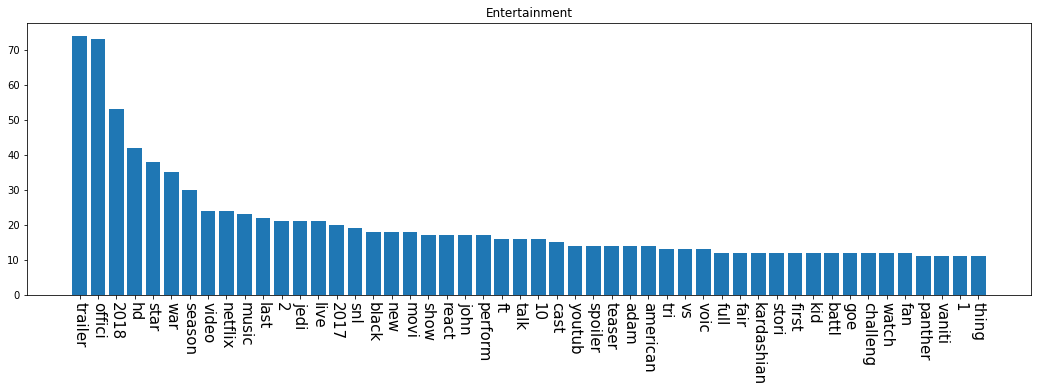

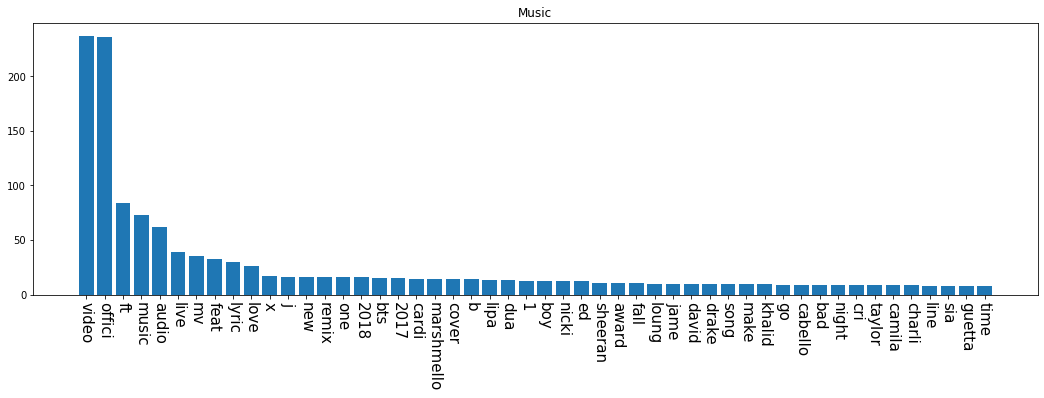

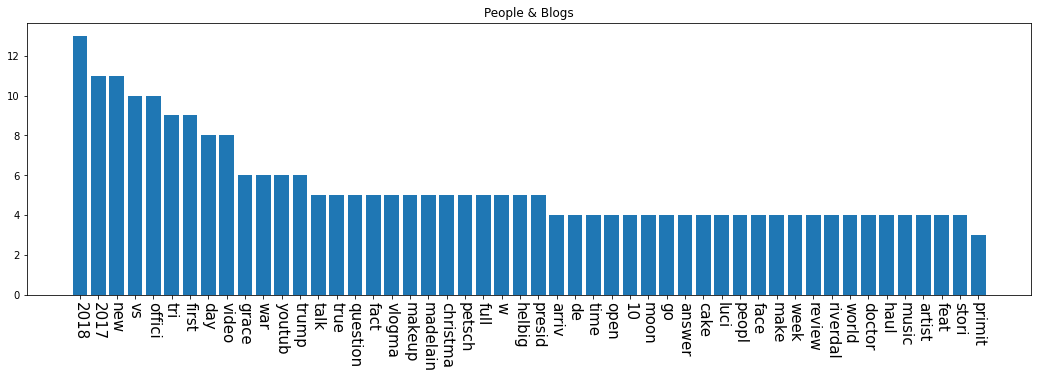

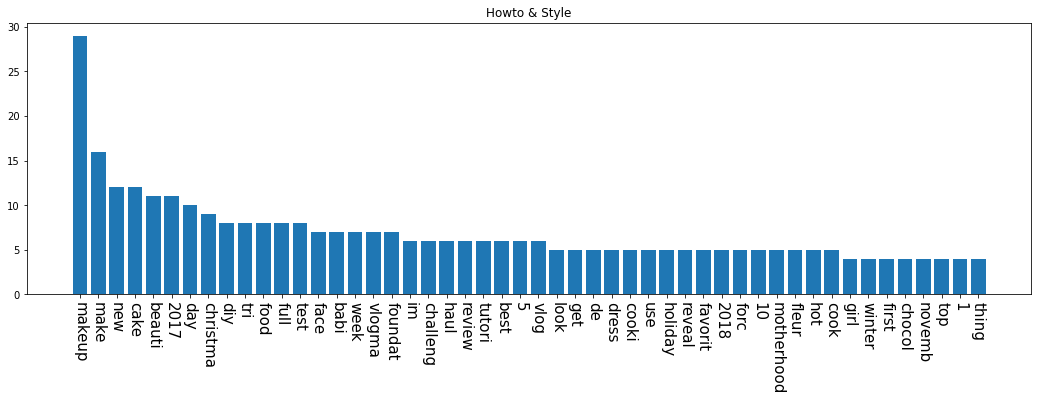

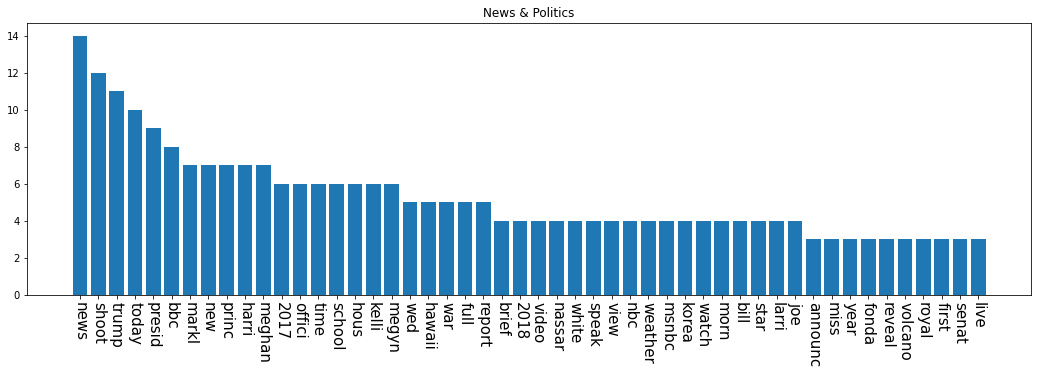

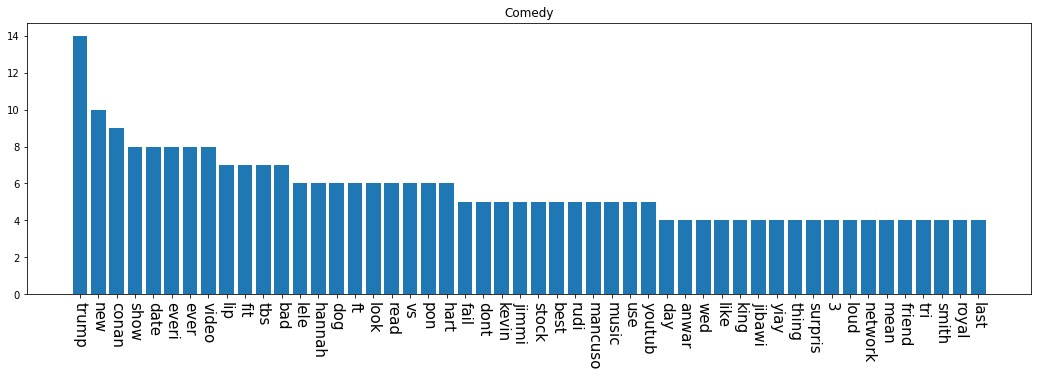

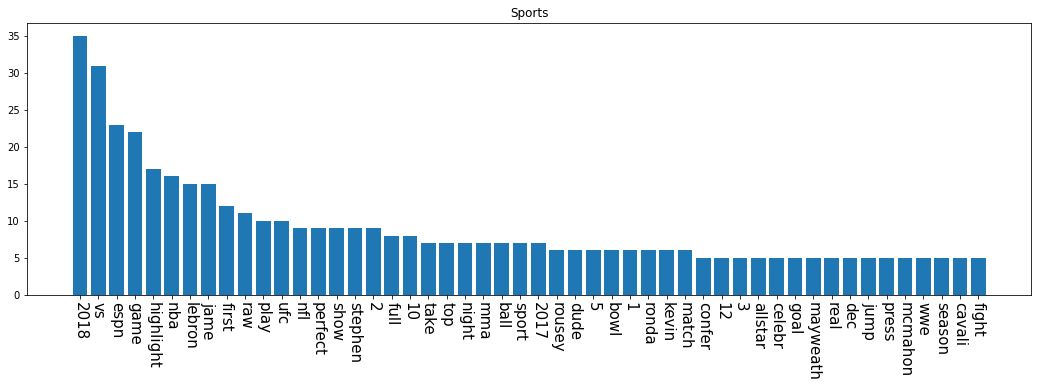

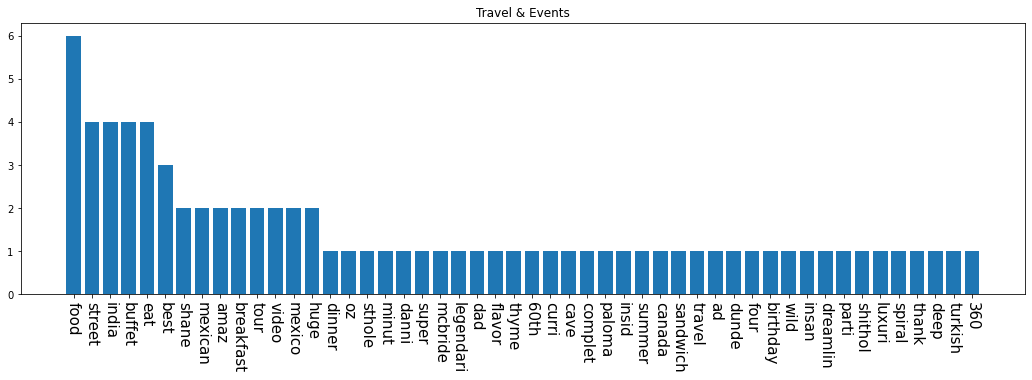

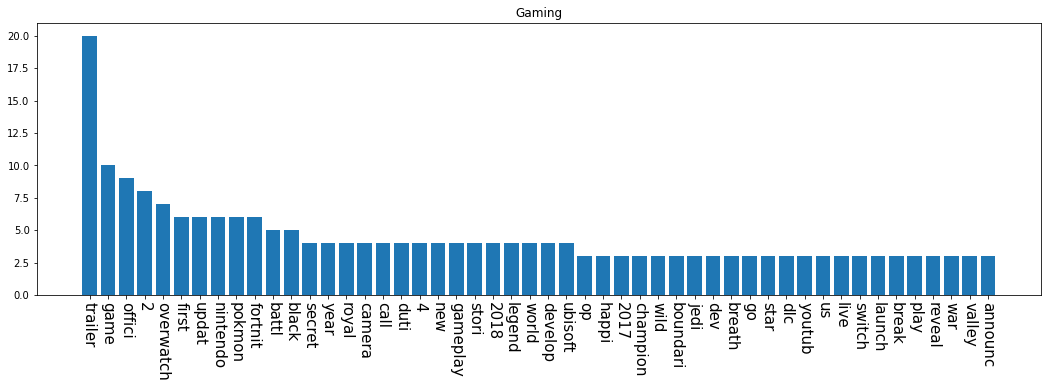

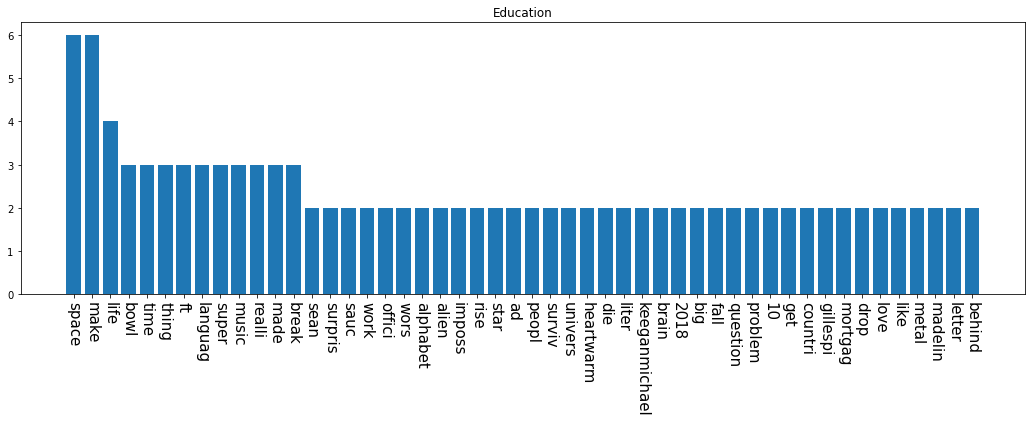

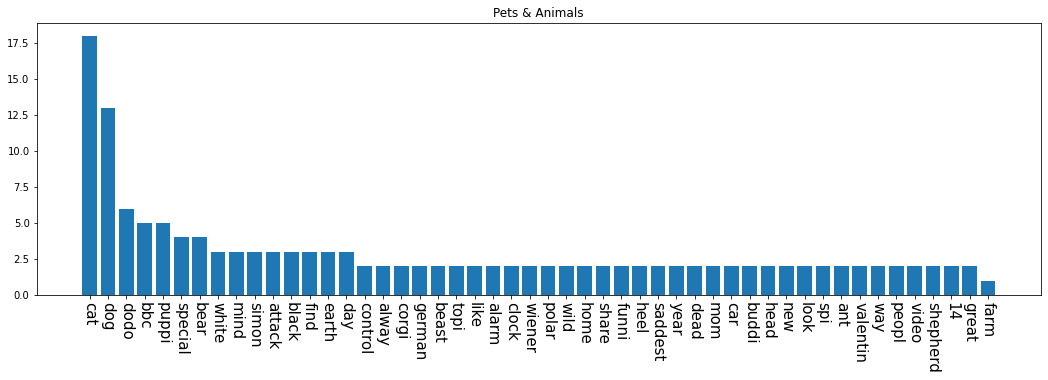

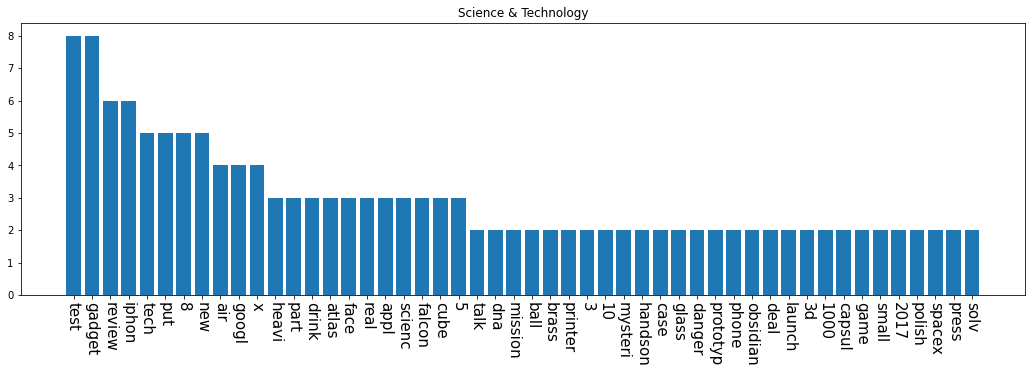

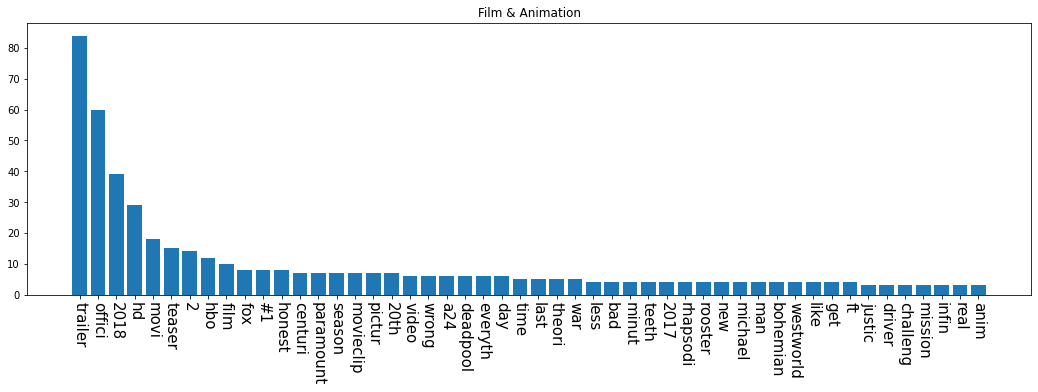

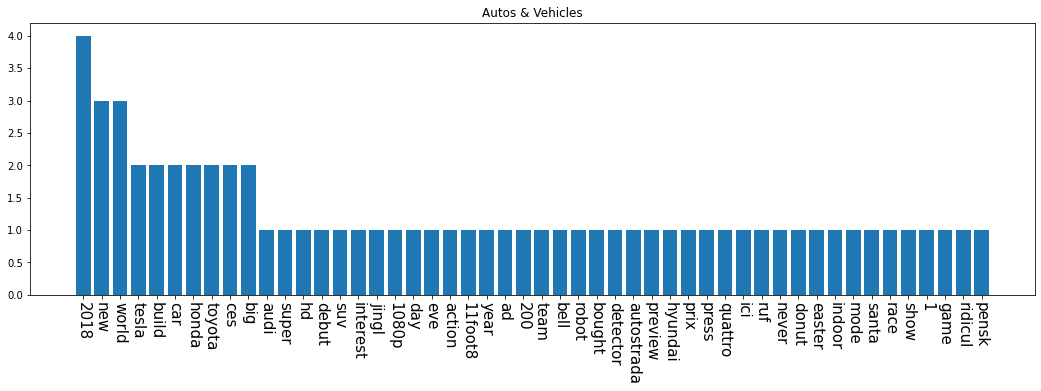

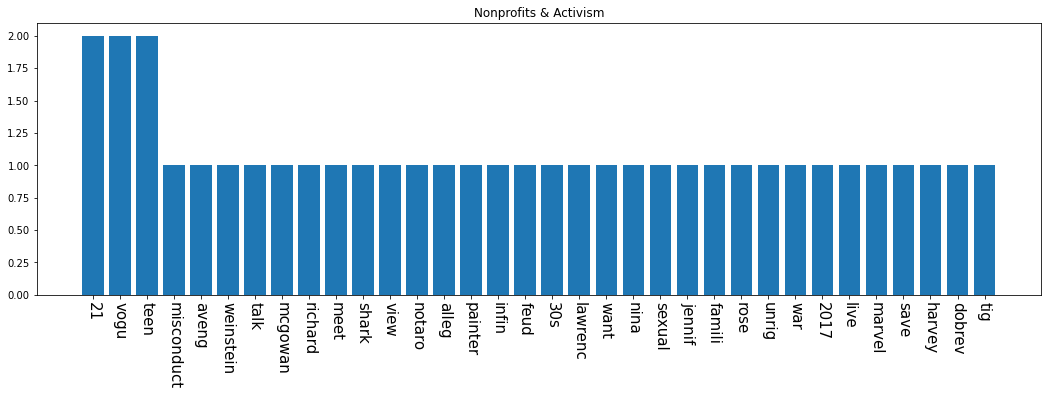

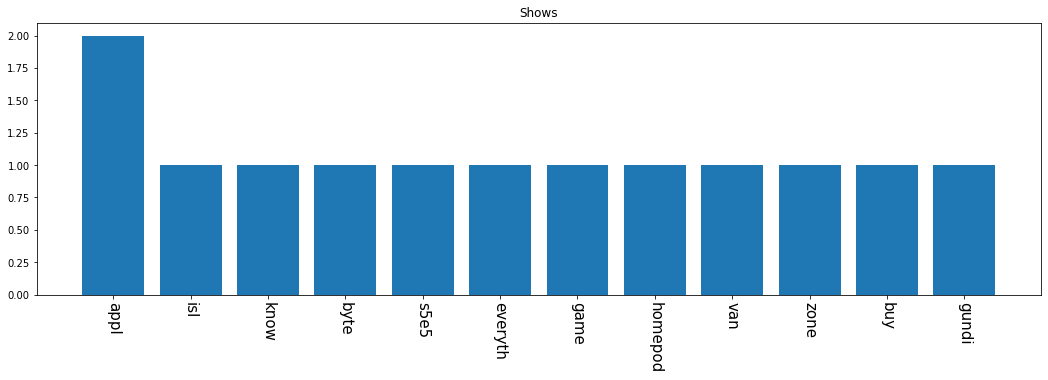

In [14]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers.json_helper import load_tokenized_text
from helpers.categories import get_categories_dict

gb = pd.read_csv(os.path.join("categories_data", "GB_videos_5p.csv"), sep=";", index_col=0)
us = pd.read_csv(os.path.join("categories_data", "US_videos_5p.csv"), sep=";", index_col=0)

gb_images = pd.read_csv(os.path.join("images_data", "GB_images_data.csv"), sep=";", index_col=0).reset_index(drop=True)
us_images = pd.read_csv(os.path.join("images_data", "US_images_data.csv"), sep=";", index_col=0).reset_index(drop=True)

gb_tokenized = load_tokenized_text(os.path.join("tokenized", "GB_grouped_titles.json"))
us_tokenized = load_tokenized_text(os.path.join("tokenized", "US_grouped_titles.json"))
print(f"US T: {len(us_tokenized)}")
print(len(us))
gb = pd.concat([gb, gb_images], axis=1)
gb["tokenized_ocr"] = gb_tokenized
gb["tokenized_ocr"] = gb["tokenized_ocr"].apply(lambda x: x[-1])

us = pd.concat([us, us_images], axis=1)
us["tokenized_ocr"] = us_tokenized
us["tokenized_ocr"] = us["tokenized_ocr"].apply(lambda x: x[-1])



videos = pd.concat([gb, us])

categories_ids = pd.unique(videos["category_id"])

categories_dict = get_categories_dict()
categories = [categories_dict[x] for x in categories_ids if not np.isnan(x)]
videos["category_name"] = videos["category_id"].apply(lambda x: np.nan if np.isnan(x) else categories_dict[x])
print(categories_ids)
print(categories)
print(videos.columns)
for cat in categories:
    data = videos[videos["category_name"] == cat]
    words = data["tokenized_ocr"].explode().dropna()
    words_counts = words.value_counts()
    words_counts = words_counts.rename_axis("words").reset_index(name="count")
    wh = words_counts.head(50)
    plt.subplots(figsize=(18,5))
    plt.bar(wh["words"], wh["count"])
    plt.title(cat)
    plt.xticks(rotation=270, fontsize=15)
    plt.show()